In [2]:
import h5py
import numpy as np
import sys
sys.path.append('../tools')
import clusterfit as cf
snapnum0 = 77 # 78 for 2.8 Gpc runs
change = np.array([])
before = np.array([])
after = np.array([])
with h5py.File('../data/halo_crossing.hdf5', 'r') as f:
    print(f['observer0/lightlike/Snapshot0076'].keys())
    for snap0 in reversed(f['observer0/spacelike'].keys()):
        snapnum0 = int(snap0[-2:])
        snapnum1 = snapnum0 - 1
        print(snapnum0, snapnum1)
        snap1 = f'Snapshot{snapnum1:04d}'
        qty0 = f[f'observer0/spacelike/{snap0}/M500'][:]
        qty1 = f[f'observer0/lightlike/{snap1}/M500'][:]

        before = np.concatenate((before, qty1))
        after = np.concatenate((after, qty0))
        change = np.concatenate((change, (qty0 - qty1)))



<KeysViewHDF5 ['GalaxyID', 'GasMass', 'LX0InRestframeWithoutRecentAGNHeating', 'LX0InRestframeWithoutRecentAGNHeatingCoreExcision', 'LX0WIthoutRecentAGNHeating', 'LX0WithoutRecentAGNHeatingCoreExcision', 'M500', 'M_fof', 'MfofSOAP', 'SOAPID', 'SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision', 'TopLeafID', 'Vx', 'Vy', 'Vz', 'Xcminpot_lc', 'Y5R500WithoutRecentAGNHeating', 'Ycminpot_lc', 'Zcminpot_lc', 'redshift0']>
77 76
76 75
75 74
74 73
73 72
72 71


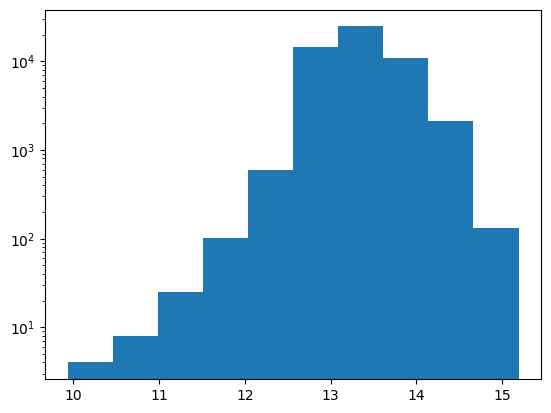

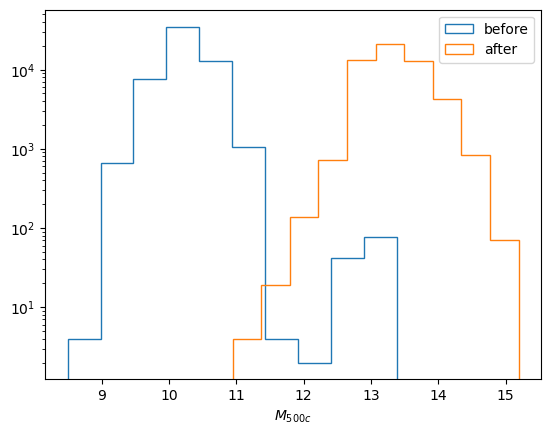

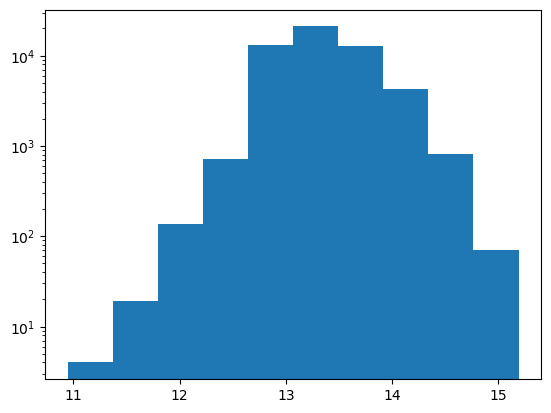

In [9]:
import matplotlib.pyplot as plt
plt.hist(np.log10(np.abs(change[change > 0])), log=True)
plt.show()
plt.hist(np.log10(before[before > 0]), log=True, histtype='step', label='before')
plt.hist(np.log10(after[after>0]), log=True, histtype='step', label='after')
plt.xlabel('$M_{{500c}}$')
plt.legend()
plt.show()
plt.hist(np.log10(after[after > 0]), log=True)
plt.show()